# 02 - Managing Content

~ Andrew Chapkowski

<img src="./img/managing_content.png"  width=75%/>

## What is Content?

- Digital information
- Excel spreadsheets, spatial data, etc..
- Services
- Web Maps
- Imagery and Raster Data

## What is Content?

- Organizations allow users and administrators to place content into logical groups
- Items, which content is derived, can be given metadata

    + title
    + type
    + tags
    
- Item `tags` provide searchable content
- Content can be categorized
- Authoritative markings


## What a User Sees

<img src="./img/sample_item.png" />

## What a Programmer Sees


<Item title:"World Imagery (Clarity)" type:Map Image Layer owner:esri>
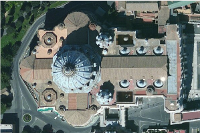

In [2]:
from arcgis.gis import GIS
gis = GIS(profile='your_online_profile')
item = gis.content.get("ab399b847323487dba26809bf11ea91a")
item

In [3]:
item.__dict__

{'_portal': <arcgis._impl.portalpy.Portal at 0x20449268eb8>,
 '_gis': GIS @ https://arcgissolutions.maps.arcgis.com version:7.2,
 'itemid': 'ab399b847323487dba26809bf11ea91a',
 'thumbnail': 'thumbnail/ago_downloaded.png',
 '_workdir': 'C:\\Users\\andr5624\\AppData\\Local\\Temp\\1',
 '_hydrated': False,
 'id': 'ab399b847323487dba26809bf11ea91a',
 'owner': 'esri',
 'orgId': 'P3ePLMYs2RVChkJx',
 'created': 1496706380000,
 'modified': 1567185566000,
 'guid': None,
 'name': None,
 'title': 'World Imagery (Clarity)',
 'type': 'Map Service',
 'typeKeywords': ['ArcGIS Server',
  'Data',
  'Map Service',
  'Service',
  'Singlelayer',
  'Tiled'],
 'description': "<div><font face='Avenir Next W01, Avenir Next W00, Avenir Next, Avenir, Helvetica Neue, Helvetica, Arial, sans-serif'><span style='font-size: 17px;'>This tile layer is designed to present imagery from our archive that may be more clear and/or accurate than what is presented in our default&nbsp;</span></font><a href='https://www.arcgis.c

## Creating New Content

- Now that we understand what content is, how do we get it into Portal programmatically?

- The `ContentManager` is the actor we work with.
- To put anyone of portal, we will use the `add` method along with some `ItemProperties`
    + `title`, `type`, `tags`

## Adding Content

- `add()` uploads content to a GIS
- Returns an `Item`
- Item Properties - information about the item
    + title, type and tags are always **required**

In [8]:
gis.content

In [7]:
new_item = gis.content.add(item_properties={
    'title' : 'School_Enrollment_Areas',
    'type' : "File Geodatabase",
    'tags' : 'Berlin, DevSummit'
}, data=r"./content/School_enrollment_areas.gdb.zip")
new_item

<Item title:"School_Enrollment_Areas" type:File Geodatabase owner:AndrewSolutions>

## Question: I added spatial data, is it a service?

## Updating Items

- Allows for the modification of all `Item` properties
- Add metadata and/or thumbnails


<Item title:"School_Enrollment_Areas" type:File Geodatabase owner:AndrewSolutions>
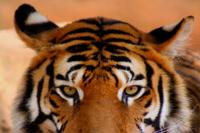

In [9]:
new_item.update(thumbnail='./content/tiger_thumbnail.jpg')
new_item

## Publishing Data

- Adding an item only places the data on the site.
- It's sort of like a Google Drive and/or a cloud harddrive
- Certain `Item` types can be published.
    + sd, Feature Classes, csv, etc...
- This creates a Hosted Feature Layer, Vector Tile, Tile Service

<Item title:"School_Enrollment_Areas" type:Feature Layer Collection owner:AndrewSolutions>
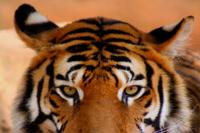

In [10]:
pitem = new_item.publish()
pitem

## Visualized Map View

In [15]:
m = gis.map('Berlin')
m

MapView(layout=Layout(height='400px', width='100%'))

In [ ]:
m.add_layer(pitem)

## Protecting Data

- Provides the ability to disseminate data with `sharing`
- Protecting ensure content does not get erased!
    + There is **NO** undo button on AGOL/Enterprise

In [18]:
pitem.protect(True)

{'success': True}

In [ ]:
pitem.delete()

In [ ]:
pitem.protect(False)

In [21]:
pitem.delete()

True

## Sharing Content

<img src="./img/sharing.jpg"  width=70%/>

- Once you have information as services and other data, it's important to allow others to access it

In [24]:
new_item.share(everyone=True)

{'results': [{'itemId': '116034cf78b94420bd255d24bd74f653',
   'success': True,
   'notSharedWith': []}]}

In [25]:
new_item.shared_with

{'everyone': True, 'org': True, 'groups': []}

## Creating Empty Services

- Create services without data or an item to publish from
- Fully customize schema via JSON

**1. Check if Service Name is Free**

In [26]:
gis.content.is_service_name_available("EuroDevSummit", service_type="featureService")

True

**2. Create an Empty Feature Service**

In [27]:
item = gis.content.create_service(name="EuroDevSummit")
item

<Item title:"EuroDevSummit" type:Feature Layer Collection owner:AndrewSolutions>

**3. Create a New Layer**

In [30]:
print(item.layers)
# Get the FS and the Manager
from arcgis.features import FeatureLayerCollection
fs = FeatureLayerCollection.fromitem(item)
mgr = fs.manager

[]


In [31]:
mgr.properties

{
  "adminServiceInfo": {
    "name": "EuroDevSummit",
    "type": "FeatureServer",
    "cacheMaxAge": 0,
    "status": "Started",
    "database": {
      "datasource": {
        "name": "db"
      }
    }
  },
  "currentVersion": 10.7,
  "serviceItemId": "674a83b86a2e43d2a9cafbbf3c9402f2",
  "serviceDescription": "",
  "hasVersionedData": false,
  "supportsDisconnectedEditing": false,
  "hasStaticData": false,
  "maxRecordCount": 1000,
  "supportedQueryFormats": "JSON",
  "supportsVCSProjection": false,
  "capabilities": "Query",
  "description": "",
  "copyrightText": "",
  "spatialReference": {
    "wkid": 102100,
    "latestWkid": 3857
  },
  "initialExtent": {
    "xmin": -20037507.0671618,
    "ymin": -30240971.9583862,
    "xmax": 20037507.0671618,
    "ymax": 18398924.324645,
    "spatialReference": {
      "wkid": 102100,
      "latestWkid": 3857
    }
  },
  "fullExtent": null,
  "allowGeometryUpdates": true,
  "units": "esriMeters",
  "supportsAppend": true,
  "syncEnabled":

In [32]:
import json
with open("./content/layer.json", 'r') as reader:
    print(mgr.add_to_definition(json_dict=json.loads(reader.read())))
item.layers[0]

{'success': True, 'layers': [{'name': 'CustomerLayer', 'id': 0}]}


<FeatureLayer url:"https://services2.arcgis.com/PWJUSsdoJDp7SgLj/arcgis/rest/services/EuroDevSummit/FeatureServer/0">

In [33]:
item.delete()

True

## Cloning Content

<img src="./img/cloning.jpg" />

- Allows for the copying of Hosted Feature Layers and items from one site to another
- **WILL NOT** configure applications


**`clone_items` provides the ability to copy content from one site to another**

<img src="./img/clone_items.jpg" />

### 15 Minute Break